In [1]:
import numpy as np
import course3.main.simulation.airplane as air_sim

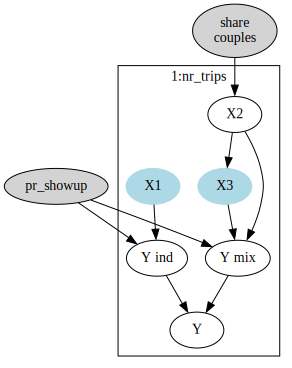

In [2]:
air_sim.plot_causal_graph()

In [4]:
# parameters
p_showup = 0.85
p_couple = 0.6
nr_samples = 2000
true_expectation = p_showup * 3

rng = np.random.default_rng(1317)
y_individuals = rng.binomial(n=3, p=p_showup, size=nr_samples)

print(f"The empirical average nr of individuals who show up is: {y_individuals.mean()}")
print(f"The theoretical average nr of individuals who show up is: {true_expectation}")

The empirical average nr of individuals who show up is: 2.5595
The theoretical average nr of individuals who show up is: 2.55


In [5]:
df = air_sim.compute_nr_passengers(p_showup, p_couple, nr_samples=nr_samples)
(df
 .groupby("third_wheel")
 .agg({
    'nr_show_up': ['mean'],
    'third_wheel': ['count']
 })
 .droplevel(axis=1, level=0).reset_index()
 .rename(columns={"mean": "avg_nr_showup", 'count': 'nr_trips'})
 .assign(third_wheel = lambda df_: df_.third_wheel == 1)
 .style
 .format({'avg_nr_showup': '{:,.2f}'})
 .bar(subset='nr_trips', color = "lightgrey")
)

,third_wheel,avg_nr_showup,nr_trips
0,False,2.53,309
1,True,2.30,1691


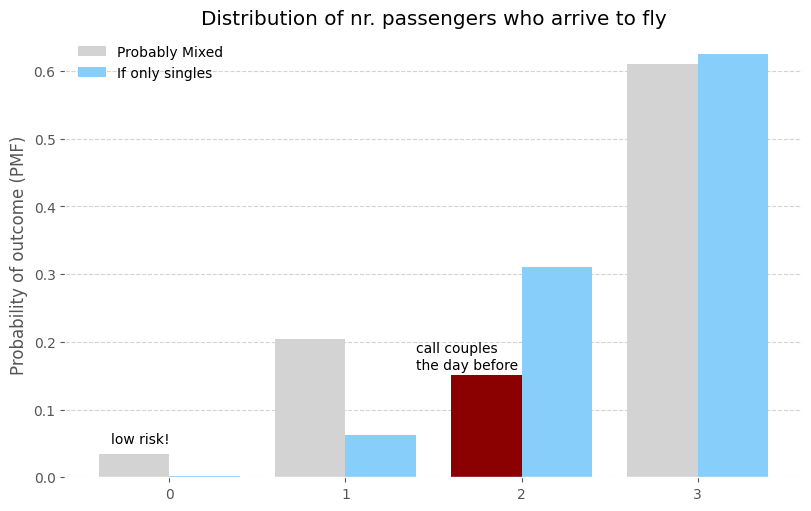

In [6]:
air_sim.plot_passengers(df, p_showup=p_showup)